#### Predict Age of the tree based on its circumference using Linear Regression Model

Linear Regression Assumptions:
    
7 Classical Assumptions of Ordinary Least Squares (OLS) Linear Regression

*Ordinary Least Squares (OLS) is the most common estimation method for linear models.As long as 
the model satisfies the OLS assumptions for linear regression,the coefficients are reliable.

*Regression analysis is like other inferential methodologies. Our goal is to draw a random 
sample from a population and use it to estimate the properties of that population.

*In regression analysis, the coefficients in the regression equation are estimates of the 
actual population parameters. 

*When your linear regression model satisfies the OLS assumptions, the procedure generates 
unbiased coefficient estimates that tend to be relatively close to the true population values
(minimum variance).

The Seven Classical OLS Assumptions

Many of these assumptions describe properties of the error term. Unfortunately, the error term 
is a population value that we’ll never know. Instead, we’ll use the next best thing that is 
available—the residuals. Residuals are the sample estimate of the error for each observation.

Residuals = Observed value – the fitted value

When it comes to checking OLS assumptions, assessing the residuals is crucial!

*There are seven classical OLS assumptions for linear regression. The first six are mandatory to
produce the best estimates. While the quality of the estimates does not depend on the seventh 
assumption, analysts often evaluate it for other important reasons.

OLS Assumption 1: The regression model is LINEAR IN COEFFICIENTS AND THE ERROR TERM
    
OLS Assumption 2: The error term has a POPULATION MEAN OF ZERO
    *The error term is nothing but the variation in the dependent variable that the independent 
    variables do not explain. Random chance should determine the values of the error term. 
    For the model to be unbiased, the average value of the error term must equal zero.we want 
    the expected value of the error to equal zero. If the expected value is +7 rather than zero, 
    part of the error term is predictable, and we should add that information to the regression 
    model itself. We want only random error left for the error term.
       *we don’t need to worry about this assumption when we include the constant in the
        regression model because it forces the mean of the residuals to equal zero.

OLS Assumption 3:No correlated between the independent variable and the error term.
    *If an independent variable is correlated with the error term, we can use the independent 
    variable to predict the error term, which violates the fact that the error term represents 
    unpredictable random error.his assumption is also referred to as exogeneity. When this type 
    of correlation exists, there is endogeneity. Violations of this assumption can occur when 
    there is measurement error in the independent variables.

OLS Assumption 4:No correlation within the error term.
    *One observation of the error term should not predict the next observation of the error term.
    This problem is known both as serial correlation and autocorrelation. Serial correlation is 
    most likely to occur in time series models. if you have information that allows you to 
    predict the error term for an observation, you must incorporate that information into the 
    model itself. To resolve this issue, you might need to add an independent variable to the 
    model that captures this information. Analysts commonly use distributed lag models, which 
    use both current values of the dependent variable and past values of independent variables.
    
OLS Assumption 5: The error term has constant variance - Homoscedastic in nature
    (no heteroscedasticity)
    *The variance of the errors should be consistent for all observations. In other words, 
    the variance does not change for each observation or for a range of observations. This 
    preferred condition is known as homoscedasticity (same scatter). If the variance changes, 
    we refer to that as heteroscedasticity (different scatter).

    *The easiest way to check this assumption is to create a residuals versus fitted 
    value(y_predict) plot.
    On this type of graph, heteroscedasticity appears as a cone shape where the spread of the 
    residuals increases in one direction.
    
    *When assumption 4 (no autocorrelation) and 5 (homoscedasticity) are both true, statisticians
    say that the error term is independent and identically distributed (IID) and refer to them 
    as spherical errors.
    
OLS Assumption 6: No independent variable is a perfect linear function of other explanatory 
    variables.No Correlation within the independent variables.
    *Perfect correlation occurs when two variables have a Pearson’s correlation coefficient of +1
    or -1. When one of the variables changes, the other variable also changes by a completely 
    fixed proportion.
    
    *Perfect correlation suggests that two variables are different forms of the same variable.For
    example, games won and games lost have a perfect negative correlation (-1). The temperature 
    in Fahrenheit and Celsius have a perfect positive correlation (+1).

    *Ordinary least squares cannot distinguish one variable from the other when they are 
    perfectly correlated. If you specify a model that contains independent variables with 
    perfect correlation, your statistical software can’t fit the model, and it will display an
    error message. You must remove one of the variables from the model to proceed.Statisticians
    refer to this condition as multicollinearity, and it reduces the precision of the estimates
    in OLS linear regression.
    
OLS Assumption 7: The error term is normally distributed (optional)
    *OLS does not require that the error term follows a normal distribution to produce unbiased 
    estimates with the minimum variance. However, satisfying this assumption allows you to 
    perform statistical hypothesis testing and generate reliable confidence intervals and 
    prediction intervals.

    *The easiest way to determine whether the residuals follow a normal distribution is to 
    assess a normal probability plot. If the residuals follow the straight line on this type 
    of graph, they are normally distributed.    
    
    

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config IPCompleter.greedy=True
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
plt.rcParams['figure.figsize']=(4,4)

Load Dataset

In [3]:
data=pd.read_csv(r"https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/doubts/orange_dataset.csv")
df=data.iloc[:,1:4]


In [4]:
df.head()

,Tree,age,circumference
0,1,118,30
1,1,484,58
2,1,664,87
3,1,1004,115
4,1,1231,120


In [5]:
df.shape

(35, 3)

In [6]:
df.isna().sum()

Tree             0
age              0
circumference    0
dtype: int64

In [7]:
df.describe()

,Tree,age,circumference
count,35.00000,35.000000,35.000000
mean,3.00000,922.142857,115.857143
std,1.43486,491.864528,57.488179
min,1.00000,118.000000,30.000000
25%,2.00000,484.000000,65.500000
50%,3.00000,1004.000000,115.000000
75%,4.00000,1372.000000,161.500000
max,5.00000,1582.000000,214.000000


In [8]:
df.columns

Index(['Tree', 'age', 'circumference'], dtype='object')

Data Visualize

<AxesSubplot:xlabel='age', ylabel='circumference'>

<AxesSubplot:xlabel='age', ylabel='Density'>

<AxesSubplot:xlabel='circumference', ylabel='Density'>

<AxesSubplot:xlabel='circumference'>

<AxesSubplot:xlabel='age'>

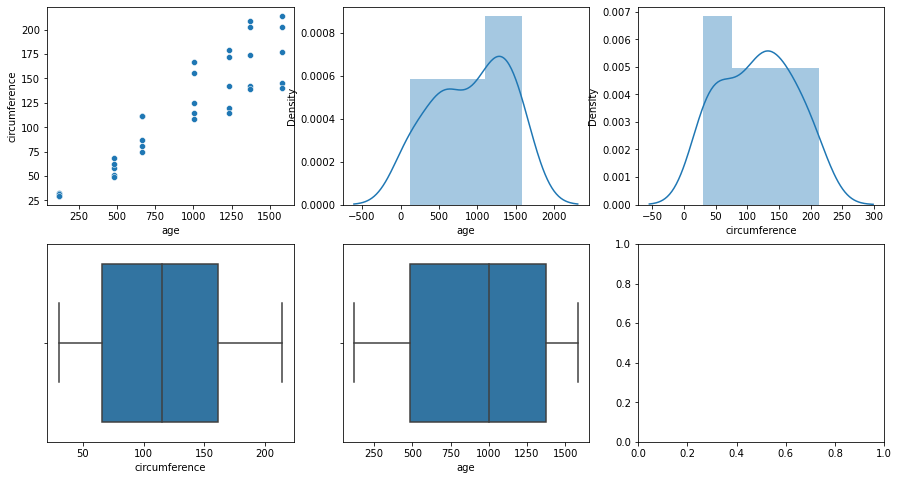

In [9]:
fig, axes=plt.subplots(2,3,figsize=(15,8))
sns.scatterplot(df['age'],df["circumference"],ax=axes[0,0])
sns.distplot(df['age'],ax=axes[0,1])
sns.distplot(df['circumference'],ax=axes[0,2])
sns.boxplot(df['circumference'],ax=axes[1,0])
sns.boxplot(df['age'],ax=axes[1,1])

Modeling & Evaluation

In [10]:
X=np.array(df.iloc[:,2]).reshape(-1,1)
y=np.array(df.iloc[:,1]).reshape(-1,1)
# y.head()

In [11]:
X.shape
y.shape


(35, 1)

(35, 1)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import probplot
import pylab

In [26]:
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
model.score(X,y)
residual=2**(y-y_pred)
res=pd.Series(residual.flatten())
y_pred=pd.Series(y_pred.flatten())


LinearRegression()

0.8345166945883684

### Check for Homoscedasticity.Variance remains constant.Residual has zero mean

<AxesSubplot:>

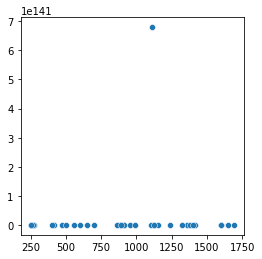

In [27]:
sns.scatterplot(y_pred,res)

In [28]:
mse=mean_squared_error(y,y_pred)
print('MSE:',mse)

MSE: 38891.62301543713


### Check for Normality of the residual

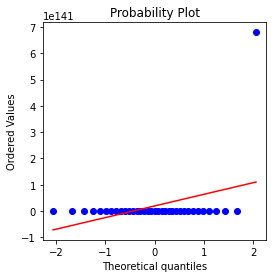

In [29]:
a=probplot(res,dist='norm',plot=pylab)

### Validation

In [30]:
def age_prediction(circumference):
    x=np.zeros(1).reshape(-1,1)
    x[0]=circumference
    
    pred=model.predict(x)
    return pred    

In [31]:
age_prediction(58)

array([[469.9315186]])

### Using Stats Model

In [32]:
import statsmodels.api as sm
from statsmodels.api import stats

By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept.
Hence, we need to use the command 'add_constant' so that it also fits an intercept

In [33]:
X=df.iloc[:,2]
y=df.iloc[:,1]
X=sm.add_constant(X)
model=sm.OLS(y,X)
lr_ols=model.fit()
prediction=lr_ols.predict(X)
lr_ols.summary()
X.head()
lr_ols.resid.mean()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.4
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.93e-14
Time:                        13:16:13   Log-Likelihood:                -234.61
No. Observations:                  35   AIC:                             473.2
Df Residuals:                      33   BIC:                             476.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.6036     78.141      0.212      0.833    -142.375     175.582
circumference     7.8160      0.606     12.900      0.000       6.583       9.049
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.200
Skew:                           0.591   Prob(JB):                        0.333
Kurtosis:                       2.667   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,const,circumference
0,1.0,30
1,1.0,58
2,1.0,87
3,1.0,115
4,1.0,120


4.4662686247777724e-13

1.R-squared	:The coefficient of determination. A statistical measure of how well the regression 
line approximates the real data points

2.Adj. R-squared :	The above value adjusted based on the number of observations and the 
degrees-of-freedom of the residuals

3.F-statistic	:A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals

4.Prob (F-statistic) :The probability that you would get the above statistic, given the null 
hypothesis that they are unrelated

5.Log-likelihood	:The log of the likelihood function.

6.AIC	:The Akaike Information Criterion. Adjusts the log-likelihood based on the number of 
observations and the complexity of the model.

7.BIC:	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for 
models with more parameters.

1.coef:	The estimated value of the coefficient

2.std err:	The basic standard error of the estimate of the coefficient. More sophisticated 
errors are also available.

3.t	:The t-statistic value. This is a measure of how statistically significant the coefficient is.

4.P > |t|:	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less 
than the confidence level, often 0.05, it indicates that there is a statistically significant 
relationship between the term and the response.

5.[95.0% Conf. Interval]:	The lower and upper values of the 95% confidence interval  

1.Skewness :	A measure of the symmetry of the data about the mean. Normally-distributed errors 
    should be symmetrically distributed about the mean (equal amounts above and below the line).
    
2.Kurtosis:	A measure of the shape of the distribution. Compares the amount of data close to the
    mean with those far away from the mean (in the tails).
    
3.Omnibus:	D’Angostino’s test. It provides a combined statistical test for the presence of 
    skewness and kurtosis.
    
4.Prob(Omnibus):	The above statistic turned into a probability

5.Jarque-Bera:	A different test of the skewness and kurtosis

6.Prob (JB):The above statistic turned into a probability

7.Durbin-Watson	:A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis

8.Cond. No	: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).

<AxesSubplot:ylabel='Density'>

<AxesSubplot:xlabel='circumference', ylabel='age'>

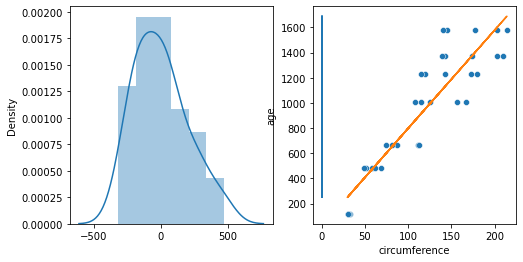

In [34]:
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.distplot(lr_ols.resid,ax=axes[0])
sns.scatterplot(df.iloc[:,2],df.iloc[:,1],ax=axes[1])
axes[1]=plt.plot(X,prediction)

In [35]:
def plot_prob(residual):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    residual.hist()
    plt.subplot(1,2,2)
    probplot(residual,dist='norm',plot=pylab)
    plt.show() 

Check for Normality of the residuals using probabaility plot

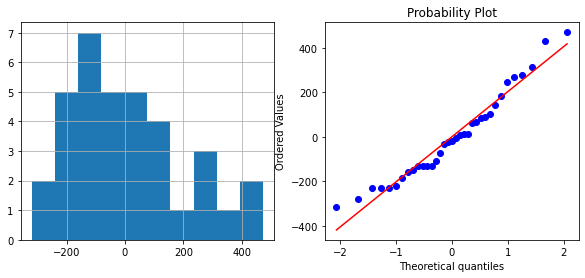

In [36]:
plot_prob(lr_ols.resid)

In [37]:
def age_prediction(circumference):
    x=np.ones(2).flatten()
    x[1]=circumference
    pred=lr_ols.predict(x)
    return pred  

In [38]:
age_prediction(58)

array([469.9315186])

<AxesSubplot:>

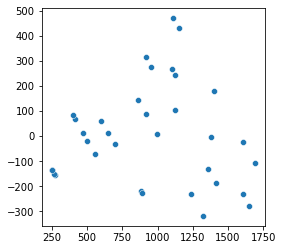

In [39]:
sns.scatterplot(prediction,lr_ols.resid)

In [40]:
import statsmodels.formula.api as fsm
f_model=fsm.ols(formula='age ~ circumference',data=df)#formula ='response ~ predictors'
f_model.fit()
f_model.df_resid

33.0